# Finding Non-Crossover Events

Sandbox for functions used in `viewer.py`

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import CSS4_COLORS as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Circle
import pandas as pd
import numpy as np

Zac's data files

In [3]:
# All SNPs -- takes a long time to load
# bsp_SNPs = pd.read_pickle('BSP_TIGER.marker_dataframe.pickle.gzip', compression='gzip')

In [4]:
# Crossover locations -- 1575 records
bsp_COs = pd.read_pickle('../BSP_COs_final_set.pickle.gzip', compression='gzip')

In [5]:
bsp_COs.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts,upstream_CB4856_purity,downstream_CB4856_purity,...,10.0Mb_downstream_geno_purity,10.0Mb_upstream_state_purity,10.0Mb_downstream_state_purity,10.0Mb_geno_purity_diff,10.0Mb_state_purity_diff,10.0Mb_state_cumulative_diff,is_CO,CO_probability,germ_cell,is_double_CO
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2,0.958271,0.000000,...,0.009974,0.963222,0.000000,0.339458,0.963222,0.897315,1,0.996,oocyte,0
175,BSP-OR-001,5,2122282,2122633,transition,BSP-OR-001-5,351,2,0.000000,0.828465,...,0.250558,0.000000,0.882883,0.248949,0.882883,0.729747,1,0.666,oocyte,0
791,BSP-OR-002,1,14819177,14819806,transition,BSP-OR-002-1,629,2,0.931145,0.000000,...,0.011019,0.978697,0.000000,0.294939,0.978697,0.567969,1,0.866,oocyte,0
794,BSP-OR-002,2,2587074,2587324,transition,BSP-OR-002-2,250,2,0.000000,0.816375,...,0.135594,0.000000,0.787037,0.132548,0.787037,0.811592,1,0.876,oocyte,0
1594,BSP-OR-003,1,12185988,12186112,transition,BSP-OR-003-1,124,2,0.000000,0.993129,...,0.396770,0.000000,0.993763,0.357180,0.993763,0.996652,1,1.000,oocyte,0


In [6]:
len(bsp_COs)

1575

In [7]:
# for s in bsp_COs.columns:
#     print(s)

In [8]:
r = bsp_COs[bsp_COs['chrom_id'] == 'BSP-OR-001-4']

In [9]:
r[['is_CO','hmm_state','upstream_CB4856_purity','downstream_CB4856_purity','normalized_CB4856_purity_diff']]

,is_CO,hmm_state,upstream_CB4856_purity,downstream_CB4856_purity,normalized_CB4856_purity_diff
172,1,transition,0.958271,0.0,1.0


In [10]:
xo = bsp_COs.groupby('chrom_id')

In [11]:
xo.get_group('BSP-OR-001-4')

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts,upstream_CB4856_purity,downstream_CB4856_purity,...,10.0Mb_downstream_geno_purity,10.0Mb_upstream_state_purity,10.0Mb_downstream_state_purity,10.0Mb_geno_purity_diff,10.0Mb_state_purity_diff,10.0Mb_state_cumulative_diff,is_CO,CO_probability,germ_cell,is_double_CO
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2,0.958271,0.0,...,0.009974,0.963222,0.0,0.339458,0.963222,0.897315,1,0.996,oocyte,0


In [12]:
# Interval file -- SNPs collapsed into blocks
bsp_intervals = pd.read_pickle('../BSP_TIGER.intervals_dataframe.pickle.gzip', compression='gzip')

In [13]:
bsp_intervals.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
100999,BSP-OR-202,1,1,2820551,N2,BSP-OR-202-1,2820551,7310
101000,BSP-OR-202,1,2820551,2820595,transition,BSP-OR-202-1,44,2
101001,BSP-OR-202,1,2820595,2821506,CB4856,BSP-OR-202-1,912,27
101002,BSP-OR-202,1,2821506,2821610,transition,BSP-OR-202-1,104,2
101003,BSP-OR-202,1,2821610,8506388,N2,BSP-OR-202-1,5684779,4643


In [14]:
clist = sorted(bsp_intervals['sample'].unique())

In [15]:
clist[:10]

['BSP-OR-001',
 'BSP-OR-002',
 'BSP-OR-003',
 'BSP-OR-004',
 'BSP-OR-005',
 'BSP-OR-006',
 'BSP-OR-007',
 'BSP-OR-008',
 'BSP-OR-009',
 'BSP-OR-010']

In [16]:
len(clist)

610

Intervals in an interesting chromosome:

In [17]:
chrom = bsp_intervals[bsp_intervals.chrom_id == 'BSP-OR-001-4']

In [18]:
chrom

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
111,BSP-OR-001,4,1,1996956,CB4856,BSP-OR-001-4,1996956,2719
112,BSP-OR-001,4,1996956,1997145,transition,BSP-OR-001-4,189,2
113,BSP-OR-001,4,1997145,1997566,N2,BSP-OR-001-4,422,19
114,BSP-OR-001,4,1997566,1997578,transition,BSP-OR-001-4,12,2
115,BSP-OR-001,4,1997578,2156628,CB4856,BSP-OR-001-4,159051,348
...,...,...,...,...,...,...,...,...
169,BSP-OR-001,4,14548901,14549615,N2,BSP-OR-001-4,715,52
170,BSP-OR-001,4,14549615,14549671,transition,BSP-OR-001-4,56,2
171,BSP-OR-001,4,14549671,15669138,CB4856,BSP-OR-001-4,1119468,3022
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2


#### Use groups for faster access

In [19]:
interval_groups = bsp_intervals.groupby('chrom_id')

In [20]:
interval_groups.get_group('BSP-OR-001-4')

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
111,BSP-OR-001,4,1,1996956,CB4856,BSP-OR-001-4,1996956,2719
112,BSP-OR-001,4,1996956,1997145,transition,BSP-OR-001-4,189,2
113,BSP-OR-001,4,1997145,1997566,N2,BSP-OR-001-4,422,19
114,BSP-OR-001,4,1997566,1997578,transition,BSP-OR-001-4,12,2
115,BSP-OR-001,4,1997578,2156628,CB4856,BSP-OR-001-4,159051,348
...,...,...,...,...,...,...,...,...
169,BSP-OR-001,4,14548901,14549615,N2,BSP-OR-001-4,715,52
170,BSP-OR-001,4,14549615,14549671,transition,BSP-OR-001-4,56,2
171,BSP-OR-001,4,14549671,15669138,CB4856,BSP-OR-001-4,1119468,3022
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2


In [21]:
interval_groups.groups.keys()

dict_keys(['BSP-OR-001-1', 'BSP-OR-001-2', 'BSP-OR-001-3', 'BSP-OR-001-4', 'BSP-OR-001-5', 'BSP-OR-001-6', 'BSP-OR-002-1', 'BSP-OR-002-2', 'BSP-OR-002-3', 'BSP-OR-002-4', 'BSP-OR-002-5', 'BSP-OR-002-6', 'BSP-OR-003-1', 'BSP-OR-003-2', 'BSP-OR-003-3', 'BSP-OR-003-4', 'BSP-OR-003-5', 'BSP-OR-003-6', 'BSP-OR-004-1', 'BSP-OR-004-2', 'BSP-OR-004-3', 'BSP-OR-004-4', 'BSP-OR-004-5', 'BSP-OR-004-6', 'BSP-OR-005-1', 'BSP-OR-005-2', 'BSP-OR-005-3', 'BSP-OR-005-4', 'BSP-OR-005-5', 'BSP-OR-005-6', 'BSP-OR-006-1', 'BSP-OR-006-2', 'BSP-OR-006-3', 'BSP-OR-006-4', 'BSP-OR-006-5', 'BSP-OR-006-6', 'BSP-OR-007-1', 'BSP-OR-007-2', 'BSP-OR-007-3', 'BSP-OR-007-4', 'BSP-OR-007-5', 'BSP-OR-007-6', 'BSP-OR-008-1', 'BSP-OR-008-2', 'BSP-OR-008-3', 'BSP-OR-008-4', 'BSP-OR-008-5', 'BSP-OR-008-6', 'BSP-OR-009-1', 'BSP-OR-009-2', 'BSP-OR-009-3', 'BSP-OR-009-4', 'BSP-OR-009-5', 'BSP-OR-009-6', 'BSP-OR-010-1', 'BSP-OR-010-2', 'BSP-OR-010-3', 'BSP-OR-010-4', 'BSP-OR-010-5', 'BSP-OR-010-6', 'BSP-OR-011-1', 'BSP-OR-011-2

In [22]:
interval_groups.get_group('BSP-OR-001-1')

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
0,BSP-OR-001,1,1,15114068,N2,BSP-OR-001-1,15114068,23379


In [23]:
# Our peak data
peaks = pd.read_csv('../peaks.csv')

In [24]:
peaks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
0,67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0,N2
1,67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0,N2
2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0,N2
3,67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0,N2
4,67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0,N2


In [25]:
peaks[(peaks.chrom_id == 'BSP-OR-001-4') & (peaks.blk_id == 0)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0,CB4856
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0,CB4856


In [26]:
pks = peaks[peaks.chrom_id == 'BSP-OR-001-4']

In [27]:
def make_circles(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    res = []
    rownum = 0
    for grp_id, grp in df.groupby('blk_id'):
        w = grp.iloc[-1].position - grp.iloc[0].position
        m =  grp.iloc[0].position + w/2
        x0 = m - 1250000
        rownum += 1
        for _, snp in grp.iterrows():
            p = (snp.position - grp.iloc[0].position) / w
            x = x0 + p*2500000
            res.append(Circle((x,-1000000*rownum),100000,color=pcolor[snp.base_geno]))
    return rownum, res

In [28]:
def make_patches(chrom):
    pcolor = {
        'CB4856': 'dodgerblue',
        'N2': 'indianred'
    }
    res = []
    for _, r in chrom.iterrows():
        c = pcolor.get(r.hmm_state) or 'lightgray'
        res.append(Rectangle((r.start,0), r.length, 500000, color=c))
        res.append(Circle((r.start,250000), 50000, color='black'))
    return res

In [29]:
def plot_intervals(chrom):
    rects = PatchCollection(make_patches(chrom), match_original=True)
    nrows, p = make_circles(pks)
    dots = PatchCollection(p, match_original=True)
    fig, ax = plt.subplots(figsize=(10,(nrows+1)/2))
    plt.box(False)
    plt.yticks([])
    plt.xticks(ticks=np.linspace(0,20000000,5), labels=[f'{int(n*20)}Mbp' for n in np.linspace(0,1,5)])
    ax.xaxis.set_ticks_position('top')
    ax.add_collection(rects)
    ax.add_collection(dots)
    plt.xlim(0,20000000)
    plt.ylim(-1000000*(nrows+1),2000000)


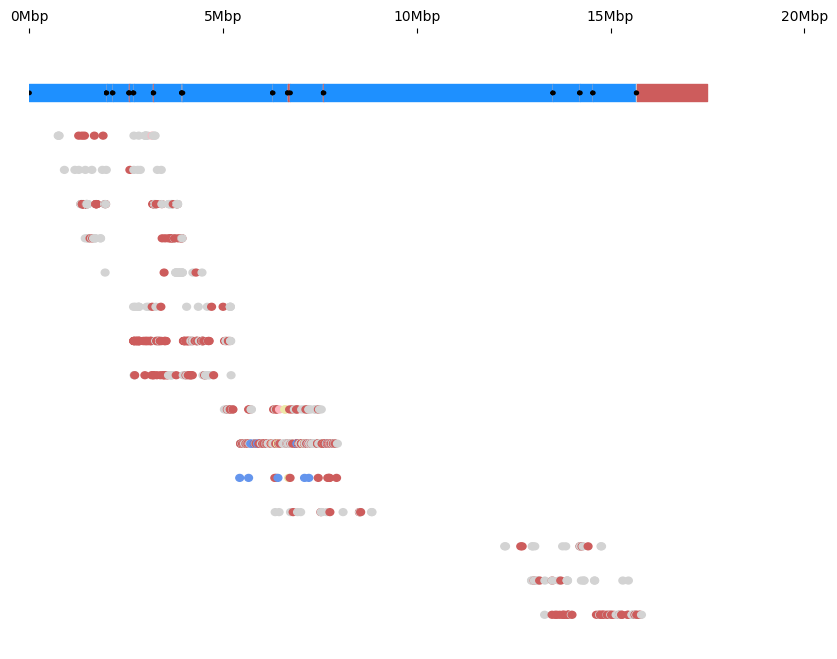

In [30]:
plot_intervals(chrom)

In [31]:
def dot_plots(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    dotfigs = {}
    for grp_id, grp in df.groupby('blk_id'):
        if len(grp) == 0:
            continue
        fig, ax = plt.subplots(figsize=(10,0.8))
        plt.box(False)
        plt.xlim(0,10)
        plt.ylim(0,0.8)
        plt.yticks([])
        x0 = grp.iloc[0].position
        w = grp.iloc[-1].position - x0
        plt.xticks(ticks=np.linspace(0,10,5), labels=[f'{int(n*w)}bp' for n in np.linspace(0,1,5)])
        plt.suptitle(f'Block #{grp_id}\nStart: {(x0/1000000):.1f}Mbp\nSize: {len(grp)} SNPs\nLength: {w}bp', x=0, y=0.75, size='medium',ha='left')
        res = []
        for _, snp in grp.iterrows():
            p = (snp.position - x0) / w
            x = p*10
            res.append(Circle((x,0.2),0.1,color=pcolor[snp.base_geno]))
        dots = PatchCollection(res, match_original=True)
        ax.add_collection(dots)
        plt.close(fig)
        dotfigs[grp_id] = fig
    return dotfigs  

In [32]:
figs = dot_plots(pks)

In [33]:
len(figs)

15

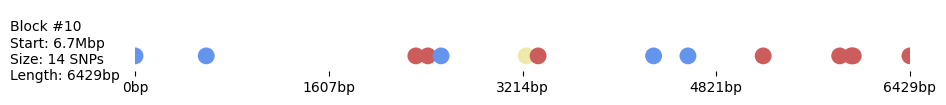

In [34]:
figs[10]

In [35]:
pks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856


In [36]:
np.arange(0,10,2.5)

array([0. , 2.5, 5. , 7.5])

In [37]:
np.linspace(0,1,5,endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [38]:
w = 526

In [39]:
[ f'{int(n*w)}bp' for n in np.linspace(0,1,5,endpoint=True)]

['0bp', '131bp', '263bp', '394bp', '526bp']

In [40]:
n = 3400000

In [41]:
f'{n:3.1f}'

'3400000.0'

In [42]:
p = True

In [43]:
p ^= 1

In [44]:
p

0

### Filters

In [45]:
blk = pks[pks.blk_id == 0]

In [46]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0,CB4856
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0,CB4856


In [47]:
s = set(blk.index)

In [48]:
pks[pks.index.isin(s)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0,CB4856
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0,CB4856


In [49]:
len(blk)

19

In [50]:
blk[blk.base_geno == blk.hmm_state1].index

Index([1979, 1980, 1981, 1982, 1983], dtype='int64')

In [51]:
blk[(blk.ref_reads + blk.var_reads) > 0]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1991,93082,BSP-OR-001,4,1997553,uN2,N2,N2,A,1,G,0,BSP-OR-001-4,0,CB4856


In [52]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0,CB4856
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0,CB4856


In [53]:
blk.columns

Index(['Unnamed: 0', 'Sample', 'chromosome', 'position', 'base_geno',
       'hmm_state1', 'hmm_state2', 'reference', 'ref_reads', 'variant',
       'var_reads', 'chrom_id', 'blk_id', 'background'],
      dtype='object')

An empty frame with the same columns as the block frames:

In [54]:
pd.DataFrame(columns=blk.columns)

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background


In [55]:
data = np.random.randint(low=0, high=100, size=1000)

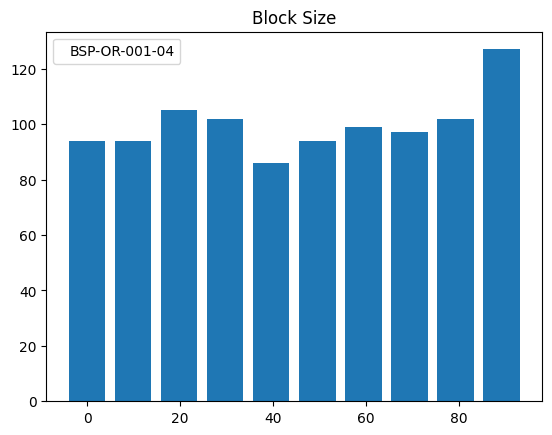

In [56]:
dct = plt.hist(data, bins=10, rwidth=0.8, align='left', label='BSP-OR-001-04')
plt.title('Block Size')
plt.legend(handlelength=0)

In [57]:
dct

(array([ 94.,  94., 105., 102.,  86.,  94.,  99.,  97., 102., 127.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

### Chromosome Lengths

In [58]:
for chr_id, chr in bsp_intervals.groupby('chromosome'):
    print(chr_id, chr.stop.max())

1 15114068
2 15311845
3 13819453
4 17493838
5 20953657
6 17739129


In [59]:
chr_length = {
    1: 15114068,
    2: 15311845,
    3: 13819453,
    4: 17493838,
    5: 20953657,
    6: 17739129,
}

In [60]:
blk.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856


In [61]:
def relative_loc(i, chr):
    return i / chr_length[chr]

In [62]:
relative_loc(1997145, 4)

0.1141627697707044

In [63]:
blk.position.apply(relative_loc, args=(4,))

1976    0.114163
1977    0.114163
1978    0.114163
1979    0.114168
1980    0.114169
1981    0.114169
1982    0.114172
1983    0.114174
1984    0.114182
1985    0.114183
1986    0.114184
1987    0.114184
1988    0.114185
1989    0.114185
1990    0.114185
1991    0.114186
1992    0.114186
1993    0.114187
1994    0.114187
Name: position, dtype: float64

In [64]:
df = pd.DataFrame({
    'a': [1,2,3],
    'b': [1,2,3],
    'c': [1,2,3],
})

In [65]:
df

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [66]:
sum(df.a,df.b)

0    7
1    8
2    9
Name: b, dtype: int64

In [67]:
sum([df[col] for col in df.columns])

0    3
1    6
2    9
dtype: int64

In [68]:
pks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856


In [69]:
len(peaks)

40587

In [70]:
worm = peaks[peaks.Sample == 'BSP-OR-001']

In [71]:
len(worm)

15848

In [72]:
for chr_id, chr in worm.groupby('chromosome'):
    print(chr_id, len(chr))

3 1976
4 889
5 12983


In [73]:
data = []
for chr_id, chr in worm.groupby('chromosome'):
    data.extend(chr.position.apply(relative_loc, args=(chr_id,)))

In [74]:
len(data)

15848

In [75]:
data[:10]

[0.0022439383092804034,
 0.0022450237357440994,
 0.002245385544565331,
 0.0022454579063295775,
 0.0022458197151508097,
 0.0022460368004435485,
 0.002247194588671491,
 0.0022474840357284763,
 0.002247918206313955,
 0.0022482800151351866]

In [76]:
data[-10:]

[0.984524897014397,
 0.9845255651555239,
 0.9845287626880597,
 0.9845288104124259,
 0.9845289535855245,
 0.9845290013098906,
 0.9845292876560879,
 0.9845300512459472,
 0.9845304807652431,
 0.9845308148358065]

In [77]:
blk.iloc[0].chromosome

np.int64(4)

In [78]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0,CB4856
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0,CB4856
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0,CB4856
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0,CB4856
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0,CB4856


In [79]:
blk.iloc[-1].position - blk.iloc[0].position

np.int64(421)

In [80]:
np.empty(10)

array([ 9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ])

In [81]:
top = 77000

In [82]:
chunksize = 10000

In [83]:
for i in range(top//chunksize+1):
    print(i*chunksize, min(top,(i+1)*chunksize))

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
70000 77000


In [84]:
len(peaks)

40587

In [85]:
!ls

filters.ipynb ncos.ipynb    peaks.ipynb   widgets.ipynb xo.ipynb


In [86]:
def load_data(fn):
    df = pd.read_csv(fn)
    res = []
    groups = df.groupby('chrom_id')
    for chr_id, chr in groups:
        for blk_id, blk in chr.groupby('blk_id'):
            res.append(blk)
    return res

In [87]:
blocks = load_data('../peaks.csv')

In [88]:
len(blocks)

440

In [89]:
data = [len(b) for b in blocks]

In [90]:
len(data)

440

In [91]:
import os

In [92]:
os.cpu_count()

12

In [93]:
df = blocks[4]

In [94]:
s = {160, 161, 162, 163, 164, 165, 166, 167, 168, 169}

In [95]:
df[df.index.isin(s)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
160,68076,BSP-OR-001,3,88644,unknown,N2,N2,A,0,C,0,BSP-OR-001-3,4,N2
161,68077,BSP-OR-001,3,88646,unknown,N2,N2,A,0,C,0,BSP-OR-001-3,4,N2
162,68078,BSP-OR-001,3,88740,unknown,N2,N2,C,0,G,0,BSP-OR-001-3,4,N2
163,68079,BSP-OR-001,3,88741,unknown,N2,N2,C,0,A,0,BSP-OR-001-3,4,N2
164,68080,BSP-OR-001,3,88785,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,4,N2
165,68081,BSP-OR-001,3,88786,unknown,N2,N2,T,0,A,0,BSP-OR-001-3,4,N2
166,68082,BSP-OR-001,3,88830,N2,N2,N2,C,4,G,0,BSP-OR-001-3,4,N2
167,68083,BSP-OR-001,3,88850,N2,N2,N2,G,4,C,0,BSP-OR-001-3,4,N2
168,68084,BSP-OR-001,3,88851,unknown,N2,N2,C,0,G,0,BSP-OR-001-3,4,N2
169,68085,BSP-OR-001,3,88854,N2,N2,N2,G,4,A,0,BSP-OR-001-3,4,N2


In [96]:
df[df.index.isin(s) & (df.base_geno == df.hmm_state1)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
166,68082,BSP-OR-001,3,88830,N2,N2,N2,C,4,G,0,BSP-OR-001-3,4,N2
167,68083,BSP-OR-001,3,88850,N2,N2,N2,G,4,C,0,BSP-OR-001-3,4,N2
169,68085,BSP-OR-001,3,88854,N2,N2,N2,G,4,A,0,BSP-OR-001-3,4,N2


In [97]:
s2 = set(s)

In [98]:
s2 &= set(df[df.index.isin(s) & (df.base_geno == df.hmm_state1)].index)

In [99]:
s2

{166, 167, 169}

In [100]:
groups = peaks.groupby('chrom_id')

In [101]:
chr = groups.get_group('BSP-OR-001-4')

In [102]:
chr.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id,background
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0,CB4856
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0,CB4856
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0,CB4856
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0,CB4856


In [110]:
len(chr)

889

In [112]:
np.nan

nan

In [113]:
hzi = pd.Series(np.nan, index=chr.index)

In [114]:
len(hzi)

889

In [115]:
chr.ref_reads / (chr.ref_reads + chr.var_reads)

1976    NaN
1977    NaN
1978    NaN
1979    1.0
1980    1.0
       ... 
2860    NaN
2861    1.0
2862    1.0
2863    1.0
2864    NaN
Length: 889, dtype: float64